In [1]:
import zipfile
import os

In [2]:
import cv2

In [3]:
cat_dog_data = zipfile.ZipFile("cats_and_dogs_filtered.zip",'r')

In [4]:
cat_dog_data.extractall("./")

In [8]:
dog_train = "./cats_and_dogs_filtered/train/dogs/"
cat_train = "./cats_and_dogs_filtered/train/cats/"

dog_test = "./cats_and_dogs_filtered/validation/dogs/"
cat_test = "./cats_and_dogs_filtered/validation/dogs/"

In [9]:
print("Input Data Shape :\n=============================")
print("Dogs data size : ",len(os.listdir(dog_train)))
print("Cats data size : ",len(os.listdir(cat_train)))

print("Test Data Shape :\n=============================")
print("Dogs data size : ",len(os.listdir(dog_test)))
print("Cats data size : ",len(os.listdir(cat_test)))

Input Data Shape :
Dogs data size :  1000
Cats data size :  1000
Test Data Shape :
Dogs data size :  500
Cats data size :  500


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

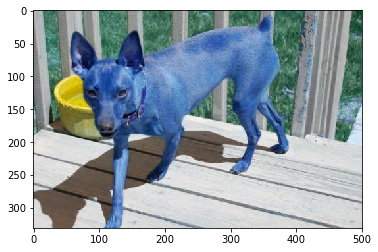

In [20]:
img1 = cv2.imread(dog_train+os.listdir(dog_train)[55])
plt.imshow(img1)

Text(0.5, 1.0, 'Cat Image')

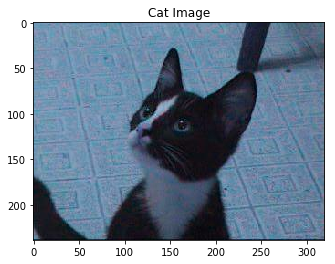

In [31]:
img2 = cv2.imread(cat_train+os.listdir(cat_train)[55])
# plt.imshow(img2/255)
plt.imshow(img2)
plt.title("Cat Image")

In [30]:
# plt.imshow(img2%100)
# plt.title("Cat Image")

In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
# model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)             0

In [56]:
training_dir = "./cats_and_dogs_filtered/train/"
testing_dir = "./cats_and_dogs_filtered/validation/"

In [57]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [58]:
train_data = train_datagen.flow_from_directory(training_dir,batch_size=10,target_size=(150,150),class_mode="binary")

Found 2000 images belonging to 2 classes.


In [59]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
test_data = test_datagen.flow_from_directory(testing_dir,batch_size=10,target_size=(150,150),class_mode="binary")

Found 1000 images belonging to 2 classes.


In [62]:
history = model.fit_generator(train_data,
                              epochs=3,
                              verbose=1,
                              validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 200 steps, validate for 100 steps
Epoch 1/3
200/200 [==============================] - 141s 704ms/step - loss: 0.6803 - acc: 0.5985 - val_loss: 0.6712 - val_acc: 0.6440
Epoch 2/3
200/200 [==============================] - 110s 552ms/step - loss: 0.6019 - acc: 0.6965 - val_loss: 0.5911 - val_acc: 0.6870
Epoch 3/3
200/200 [==============================] - 110s 552ms/step - loss: 0.5268 - acc: 0.7570 - val_loss: 0.6607 - val_acc: 0.7210


In [63]:
history.history['acc']

[0.5985, 0.6965, 0.757]

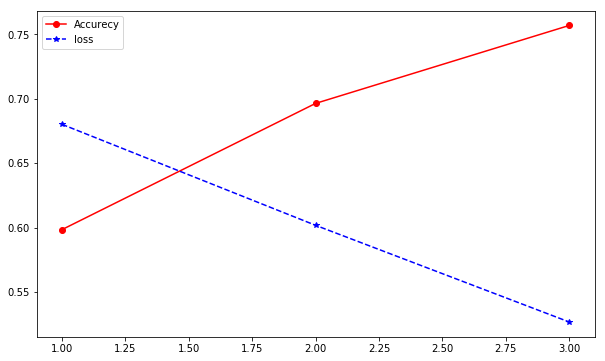

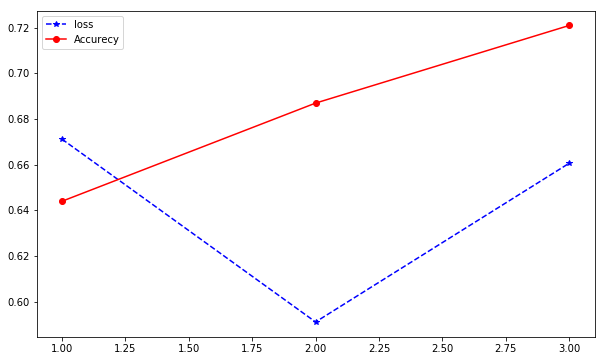

In [69]:
plt.figure(figsize=(10,6))
plt.plot([1,2,3],history.history['acc'],'ro-',label="Accurecy")
plt.plot([1,2,3],history.history['loss'],'b*--',label="loss")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.plot([1,2,3],history.history['val_loss'],'b*--',label="loss")
plt.plot([1,2,3],history.history['val_acc'],'ro-',label="Accurecy")
plt.legend()

In [70]:
# Model2 for Augmentation

In [89]:
# model2
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model2.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [90]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18496)            

In [78]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
)

In [79]:
train_data = train_datagen.flow_from_directory(training_dir,target_size=(150,150),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [80]:
history = model2.fit_generator(train_data,
                              epochs=6,
                              verbose=1,
                              validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 100 steps
Epoch 1/6
63/63 [==============================] - 87s 1s/step - loss: 0.6660 - acc: 0.6190 - val_loss: 0.6405 - val_acc: 0.6160
Epoch 2/6
63/63 [==============================] - 86s 1s/step - loss: 0.6551 - acc: 0.6245 - val_loss: 0.6650 - val_acc: 0.5880
Epoch 3/6
63/63 [==============================] - 77s 1s/step - loss: 0.6444 - acc: 0.6435 - val_loss: 0.6503 - val_acc: 0.6130
Epoch 4/6
63/63 [==============================] - 67s 1s/step - loss: 0.6216 - acc: 0.6640 - val_loss: 0.5794 - val_acc: 0.6890
Epoch 5/6
63/63 [==============================] - 77s 1s/step - loss: 0.6203 - acc: 0.6530 - val_loss: 0.5504 - val_acc: 0.7150
Epoch 6/6
63/63 [==============================] - 80s 1s/step - loss: 0.5986 - acc: 0.6715 - val_loss: 0.6288 - val_acc: 0.6670


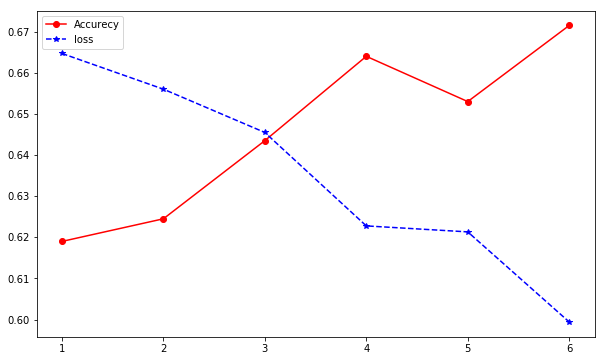

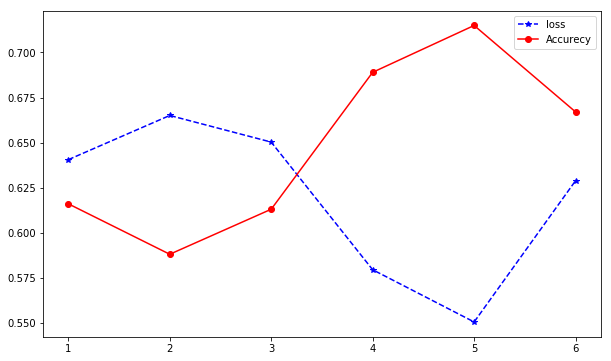

In [81]:
plt.figure(figsize=(10,6))
plt.plot([1,2,3,4,5,6],history.history['acc'],'ro-',label="Accurecy")
plt.plot([1,2,3,4,5,6],history.history['loss'],'b*--',label="loss")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.plot([1,2,3,4,5,6],history.history['val_loss'],'b*--',label="loss")
plt.plot([1,2,3,4,5,6],history.history['val_acc'],'ro-',label="Accurecy")
plt.legend()

In [83]:
model2.layers

In [87]:
model2.count_params()

9494561

In [ ]:
model2.predict()

In [91]:
img1.shape

(331, 500, 3)

In [93]:
import numpy as np

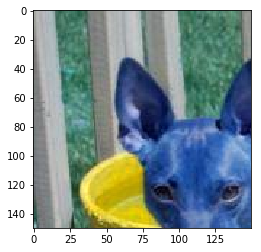

In [97]:
plt.imshow(img1[:150,:150,:3])

In [100]:
img1 = cv2.resize(img1,(150,150))

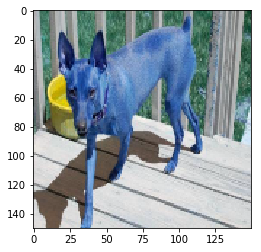

In [101]:
plt.imshow(img1[:150,:150,:3])

In [107]:
img1 = img1.reshape((1,150,150,3))

In [108]:
img1.shape

(1, 150, 150, 3)

In [109]:
model.predict(img1)

array([[1.]], dtype=float32)

In [111]:
img2 = cv2.resize(img2,(150,150))
img2 = img2.reshape((1,150,150,3))

In [112]:
img2.shape

(1, 150, 150, 3)

In [113]:
model.predict(img2)

array([[1.]], dtype=float32)

In [114]:
model2.predict(img1)

array([[1.]], dtype=float32)

In [115]:
model2.predict(img2)

array([[1.]], dtype=float32)